# **House sale prices**

## Objectives

* Train a machine learning model to predict house prices.
* Use the prepared and transformed data created in previous steps (DataCollection, DataCleaning, and FeatureEngineering).
* Optimize hyperparameters to improve the model’s performance.

## Inputs

* Dataset with house prices that has gone through **data preparation** and **feature engineering** (`HousePricesCleaned.csv`, `HousePricesFeatures.csv`).
* Libraries for machine learning and data handling, including:
  - `pandas` for data manipulation.
  - `sklearn` for machine learning and model training.
  - `matplotlib` and `seaborn` for visualizations.

## Outputs

* Trained machine learning model.
* Predictions made on test data and an evaluation of how well the model performed.
* Visuals showing the model's predictions and errors.
* Saved predictions or the trained model for future use.

___

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues'

___

Imports

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load data

In [67]:
# Load the dataset
df = pd.read_csv("outputs/datasets/collection/HousePricesFeatures.csv")
print(df.head())
print(df.info())

# Check non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

   2ndFlrSF  BedroomAbvGr  BsmtFinSF1  GarageArea  GrLivArea  BsmtExposure_Av  \
0  1.213595      0.153895    0.575425    0.351000   0.370333                0   
1 -0.756746      0.153895    1.171992   -0.060731  -0.482512                0   
2  1.241281      0.153895    0.092907    0.631726   0.515013                0   
3 -0.756746      0.153895   -0.499274    0.790804   0.383659                0   
4 -0.756746      1.416182    0.463568    1.698485   1.299326                1   

   BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  BsmtFinType1_ALQ  ...  \
0                0                0                1                 0  ...   
1                1                0                0                 1  ...   
2                0                1                0                 0  ...   
3                0                0                1                 1  ...   
4                0                0                0                 0  ...   

   BsmtFinType1_Rec  BsmtFinType1_Unf 

Define features and target variable

In [68]:
# Define features (X) and target (y)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

Split Data into Training and Testing Sets

In [69]:
# Log-transform the target variable
y_log = np.log1p(y)

# Train-test split with the log-transformed target variable
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=42)

Create a machine learning pipeline (**Linear Regression**)

In [73]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('model', LinearRegression())  # Model to train
])

# Perform cross-validation on Linear Regression model
cross_val_scores_lr = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

# Print out the average cross-validation score and standard deviation
print(f"Cross-Validation R2 Scores for Linear Regression: {cross_val_scores_lr}")
print(f"Average R2 Score: {cross_val_scores_lr.mean():.2f}")
print(f"Standard Deviation of R2 Score: {cross_val_scores_lr.std():.2f}")

# Fit the pipeline
pipeline.fit(X_train, y_train)

Cross-Validation R2 Scores for Linear Regression: [0.78722735 0.39497436 0.7595147  0.73784878 0.81986576]
Average R2 Score: 0.70
Standard Deviation of R2 Score: 0.15


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [74]:
# Make Predictions
# Predict values for training and test datasets
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

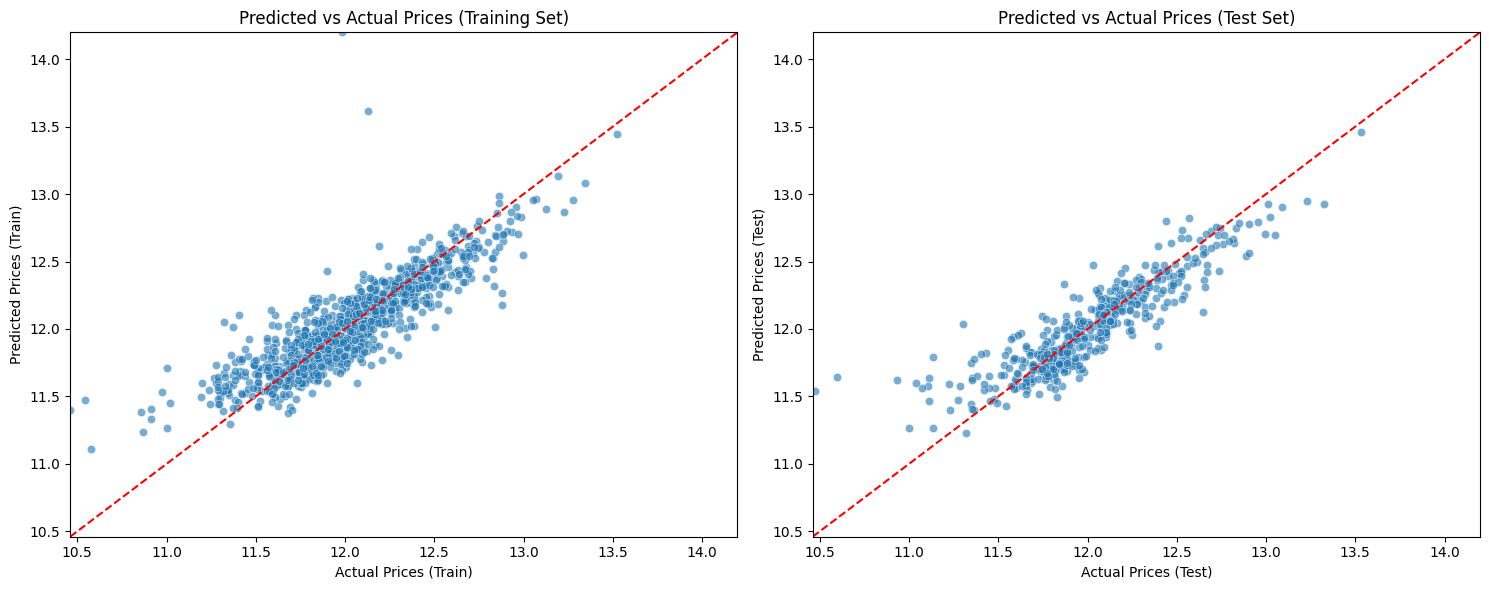

R2 Score (Trainingset): 0.75
R2 Score (Testset): 0.79


In [75]:
# Create subplots to compare actual vs predicted values
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Set common limits for both plots
min_value = min(y_train.min(), y_test.min(), y_pred_train.min(), y_pred_test.min())
max_value = max(y_train.max(), y_test.max(), y_pred_train.max(), y_pred_test.max())

# Training set
sns.scatterplot(x=y_train, y=y_pred_train, ax=axes[0], alpha=0.6)
axes[0].plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--')  # Add a red line for predictions
axes[0].set_xlabel('Actual Prices (Train)')
axes[0].set_ylabel('Predicted Prices (Train)')
axes[0].set_title('Predicted vs Actual Prices (Training Set)')
axes[0].set_xlim(min_value, max_value)
axes[0].set_ylim(min_value, max_value)

# Test set
sns.scatterplot(x=y_test, y=y_pred_test, ax=axes[1], alpha=0.6)
axes[1].plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--')  # Add a red line for predictions
axes[1].set_xlabel('Actual Prices (Test)')
axes[1].set_ylabel('Predicted Prices (Test)')
axes[1].set_title('Predicted vs Actual Prices (Test Set)')
axes[1].set_xlim(min_value, max_value)
axes[1].set_ylim(min_value, max_value)

plt.tight_layout()
plt.show()

# Calculate R2 scores for training and test sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print R2 scores
print(f"R2 Score (Trainingset): {r2_train:.2f}")
print(f"R2 Score (Testset): {r2_test:.2f}")

The **Linear Regression** model got an R2 score of **0.75** for training and **0.79** for testing. This means the model works okay, but there is room for improvement.

___

Create a machine learning pipeline (**RandomForestRegressor**)

In [76]:
# Update pipeline to include the best parameters
best_regressor_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Add feature scaling step
    ('model', RandomForestRegressor(max_leaf_nodes=50, random_state=0))  # Best parameters from your optimization
])

# Perform cross-validation on Random Forest model
cross_val_scores_rf = cross_val_score(best_regressor_pipeline, X_train, y_train, cv=5, scoring='r2')

# Print out the average cross-validation score and standard deviation
print(f"Cross-Validation R2 Scores for Random Forest: {cross_val_scores_rf}")
print(f"Average R2 Score: {cross_val_scores_rf.mean():.2f}")
print(f"Standard Deviation of R2 Score: {cross_val_scores_rf.std():.2f}")

# Fit the pipeline
best_regressor_pipeline.fit(X_train, y_train)

Cross-Validation R2 Scores for Random Forest: [0.77385578 0.69436939 0.78225384 0.78036189 0.81980207]
Average R2 Score: 0.77
Standard Deviation of R2 Score: 0.04


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_leaf_nodes=50, random_state=0))])

Plot the features used in model

In [77]:
# Get feature names used in the model
features = X_train.columns

# Print out feature names
print("Features used in the model:")
for feature in features:
    print(feature)


Features used in the model:
2ndFlrSF
BedroomAbvGr
BsmtFinSF1
GarageArea
GrLivArea
BsmtExposure_Av
BsmtExposure_Gd
BsmtExposure_Mn
BsmtExposure_No
BsmtFinType1_ALQ
BsmtFinType1_BLQ
BsmtFinType1_GLQ
BsmtFinType1_LwQ
BsmtFinType1_Rec
BsmtFinType1_Unf
GarageFinish_Fin
GarageFinish_RFn
GarageFinish_Unf
KitchenQual_Ex
KitchenQual_Fa
KitchenQual_Gd
KitchenQual_TA


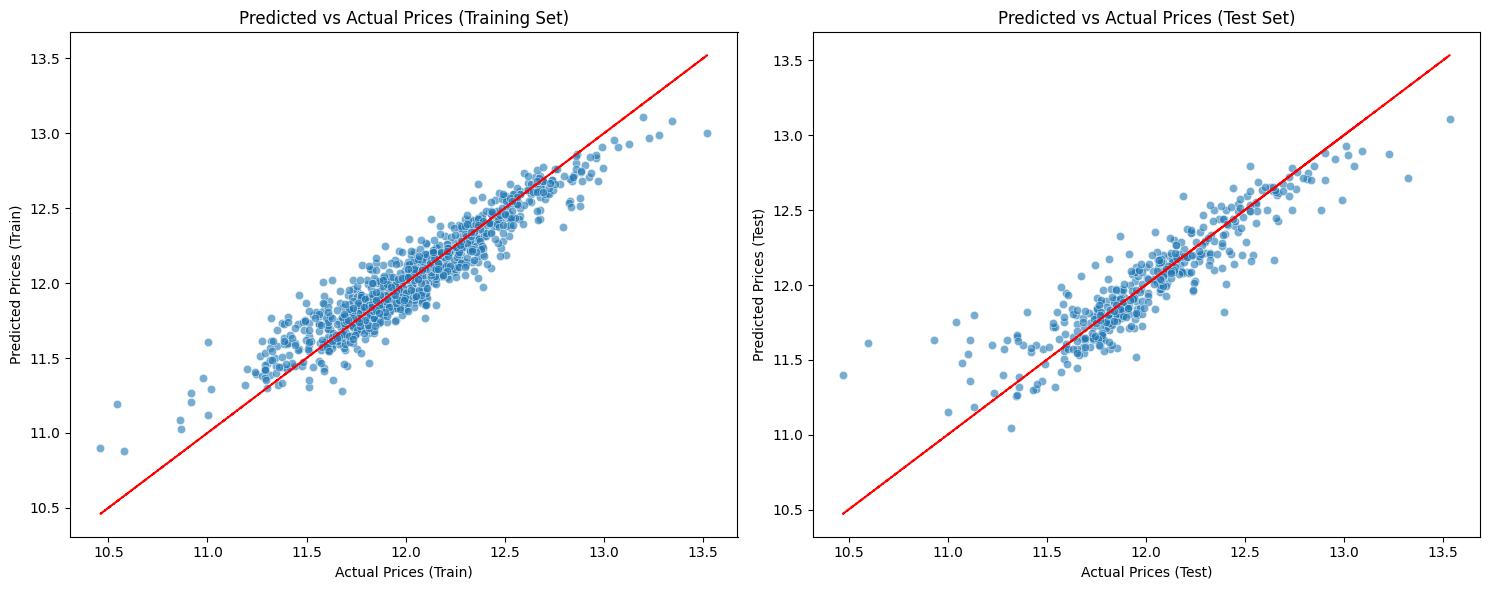

R2 Score (Trainingset): 0.89
R2 Score (Testset): 0.82


In [78]:
# Visualize predicted vs actual values for the training and test dataset
def plot_train_test_results(X_train, y_train, X_test, y_test, pipeline):
    # Predict values for training and test datasets
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    # Create subplots to compare actual vs predicted values
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Training set
    sns.scatterplot(x=y_train, y=y_pred_train, ax=axes[0], alpha=0.6)
    axes[0].plot(y_train, y_train, color='red', linestyle='--')  # Add a red line for perfect predictions
    axes[0].set_xlabel('Actual Prices (Train)')
    axes[0].set_ylabel('Predicted Prices (Train)')
    axes[0].set_title('Predicted vs Actual Prices (Training Set)')

    # Test set
    sns.scatterplot(x=y_test, y=y_pred_test, ax=axes[1], alpha=0.6)
    axes[1].plot(y_test, y_test, color='red', linestyle='--')  # Add a red line for perfect predictions
    axes[1].set_xlabel('Actual Prices (Test)')
    axes[1].set_ylabel('Predicted Prices (Test)')
    axes[1].set_title('Predicted vs Actual Prices (Test Set)')

    plt.tight_layout()
    plt.show()

    # Calculate R² scores for training and test sets
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Print R2 scores
    print(f"R2 Score (Trainingset): {r2_train:.2f}")
    print(f"R2 Score (Testset): {r2_test:.2f}")

# Use the function to visualize training and test results
plot_train_test_results(X_train, y_train, X_test, y_test, best_regressor_pipeline)

The **RandomForestRegressor** model performs well with an R2 score of **0.89** for training and **0.82** for testing. This means it predicts prices quite accurately without overfitting.

___

Create a machine learning pipeline (**GradientBoostingRegressor**)

In [79]:
# Create a machine learning pipeline with Gradient Boosting
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('model', GradientBoostingRegressor(random_state=42))  # Model to train
])

# Perform cross-validation on Gradient Boosting model
cross_val_scores_gb = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

# Print out the average cross-validation score and standard deviation
print(f"Cross-Validation R2 Scores for Gradient Boosting: {cross_val_scores_gb}")
print(f"Average R2 Score: {cross_val_scores_gb.mean():.2f}")
print(f"Standard Deviation of R2 Score: {cross_val_scores_gb.std():.2f}")

# Train the pipeline with initial hyperparameters
pipeline.fit(X_train, y_train)


Cross-Validation R2 Scores for Gradient Boosting: [0.78733052 0.68311257 0.79687335 0.77874688 0.80707158]
Average R2 Score: 0.77
Standard Deviation of R2 Score: 0.04


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingRegressor(random_state=42))])

Make predictions and evaluate model

In [83]:
# Make predictions and evaluate model on log-transformed target
y_pred_log = pipeline.predict(X_test)

# Inverse log-transform predictions and target to evaluate in original scale
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)

# Evaluate the model
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)
print(f"Mean Squared Error (Gradient Boosting, Log-transformed): {mse}")
print(f"R2 Score (Gradient Boosting, Log-transformed): {r2}")


Mean Squared Error (Gradient Boosting, Log-transformed): 1188020310.6283138
R2 Score (Gradient Boosting, Log-transformed): 0.8297500218070448


Visualize

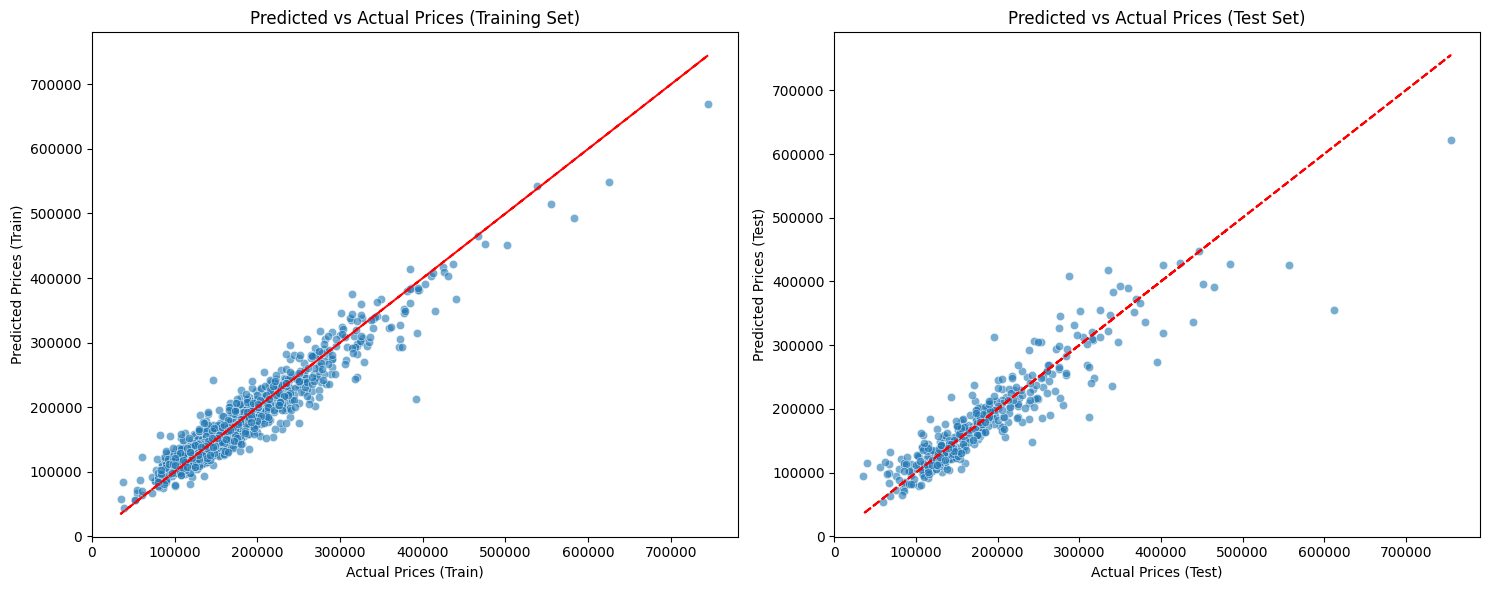

R2 Score (Trainingset): 0.92
R2 Score (Testset): 0.85


In [ ]:
# Use the trained Gradient Boosting model for visualization
def plot_gradient_boosting_results(X_train, y_train, X_test, y_test, pipeline):
    # Predict values for training and test datasets
    y_pred_train_log = pipeline.predict(X_train)
    y_pred_test_log = pipeline.predict(X_test)

    # Inverse log-transform predictions to get them on the original scale
    y_pred_train = np.expm1(y_pred_train_log)
    y_pred_test = np.expm1(y_pred_test_log)
    y_train_original = np.expm1(y_train)
    y_test_original = np.expm1(y_test)

    # Create subplots to compare actual vs predicted values
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Training set
    sns.scatterplot(x=y_train_original, y=y_pred_train, ax=axes[0], alpha=0.6)
    axes[0].plot(y_train_original, y_train_original, color='red', linestyle='--')  # Add a red line for perfect predictions
    axes[0].set_xlabel('Actual Prices (Train)')
    axes[0].set_ylabel('Predicted Prices (Train)')
    axes[0].set_title('Predicted vs Actual Prices (Training Set)')
    axes[0].set_xlim(left=0)

    # Test set
    sns.scatterplot(x=y_test_original, y=y_pred_test, ax=axes[1], alpha=0.6)
    axes[1].plot(y_test_original, y_test_original, color='red', linestyle='--')  # Add a red line for perfect predictions
    axes[1].set_xlabel('Actual Prices (Test)')
    axes[1].set_ylabel('Predicted Prices (Test)')
    axes[1].set_title('Predicted vs Actual Prices (Test Set)')
    axes[1].set_xlim(left=0)

    plt.tight_layout()
    plt.show()

    # Print R2 scores
    r2_train = r2_score(y_train_original, y_pred_train)
    r2_test = r2_score(y_test_original, y_pred_test)
    print(f"R2 Score (Trainingset): {r2_train:.2f}")
    print(f"R2 Score (Testset): {r2_test:.2f}")

# Use the function to visualize training and test results
plot_gradient_boosting_results(X_train, y_train, X_test, y_test, pipeline)


The **GradientBoostingRegressor** model performs well with an R2 score of **0.92** for training and **0.85** for testing. This means it predicts house prices accurately without overfitting, and it's an improvement over the previous model.

___

Create a machine learning pipeline (**ExtraTreesRegressor**)

In [82]:
# Create a machine learning pipeline with Extra Trees Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('model', ExtraTreesRegressor(random_state=42))  # Model to train
])

# Perform cross-validation on Extra Trees Regressor model
cross_val_scores_et = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

# Print out the average cross-validation score and standard deviation
print(f"Cross-Validation R2 Scores for Extra Trees Regressor: {cross_val_scores_et}")
print(f"Average R2 Score: {cross_val_scores_et.mean():.2f}")
print(f"Standard Deviation of R2 Score: {cross_val_scores_et.std():.2f}")

# Train the pipeline
pipeline.fit(X_train, y_train)

Cross-Validation R2 Scores for Extra Trees Regressor: [0.78293317 0.66803591 0.76487475 0.76059741 0.80704551]
Average R2 Score: 0.76
Standard Deviation of R2 Score: 0.05


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', ExtraTreesRegressor(random_state=42))])

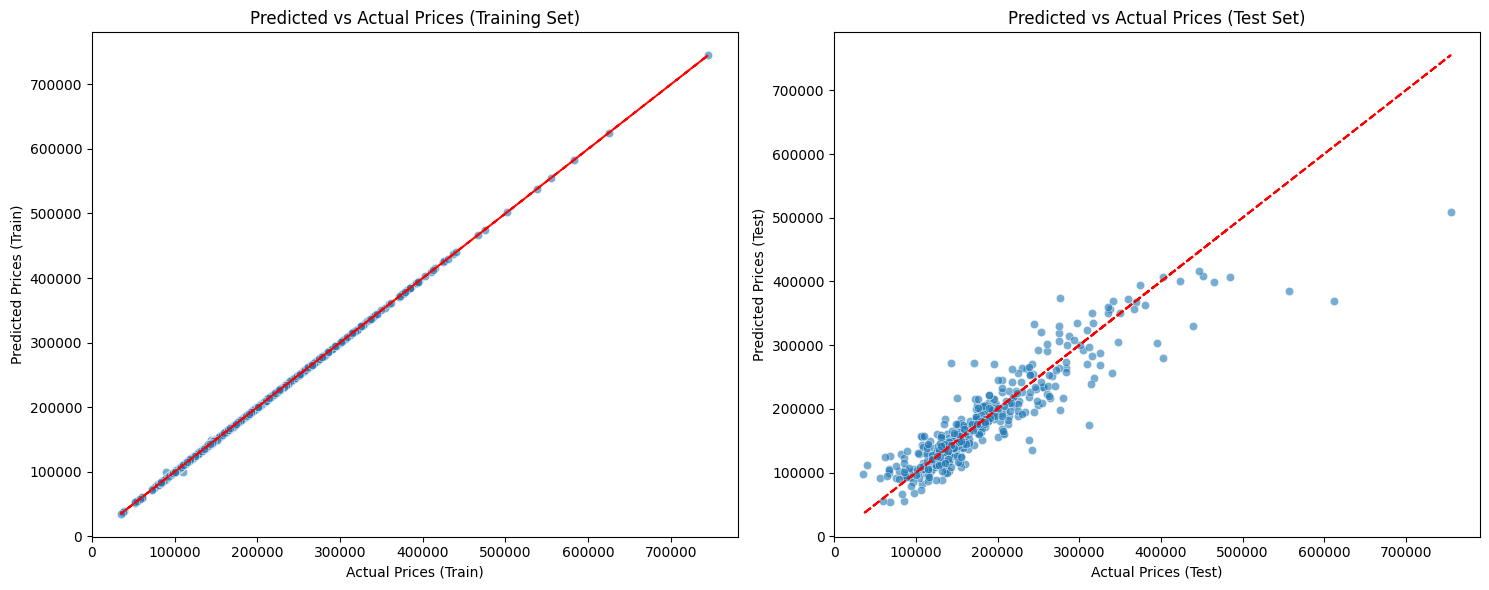

R2 Score (Trainingset): 1.00
R2 Score (Testset): 0.83


In [ ]:
# Predict values for training and test datasets
y_pred_train_log = pipeline.predict(X_train)
y_pred_test_log = pipeline.predict(X_test)

# Inverse log-transform predictions to get them on the original scale
y_pred_train = np.expm1(y_pred_train_log)
y_pred_test = np.expm1(y_pred_test_log)
y_train_original = np.expm1(y_train)
y_test_original = np.expm1(y_test)

# Create subplots to compare actual vs predicted values
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Training set
sns.scatterplot(x=y_train_original, y=y_pred_train, ax=axes[0], alpha=0.6)
axes[0].plot(y_train_original, y_train_original, color='red', linestyle='--')  # Add a red line for perfect predictions
axes[0].set_xlabel('Actual Prices (Train)')
axes[0].set_ylabel('Predicted Prices (Train)')
axes[0].set_title('Predicted vs Actual Prices (Training Set)')
axes[0].set_xlim(left=0)

# Test set
sns.scatterplot(x=y_test_original, y=y_pred_test, ax=axes[1], alpha=0.6)
axes[1].plot(y_test_original, y_test_original, color='red', linestyle='--')  # Add a red line for perfect predictions
axes[1].set_xlabel('Actual Prices (Test)')
axes[1].set_ylabel('Predicted Prices (Test)')
axes[1].set_title('Predicted vs Actual Prices (Test Set)')
axes[1].set_xlim(left=0)

plt.tight_layout()
plt.show()

# Calculate R2 scores for training and test sets
r2_train = r2_score(y_train_original, y_pred_train)
r2_test = r2_score(y_test_original, y_pred_test)

# Print R2 scores
print(f"R2 Score (Trainingset): {r2_train:.2f}")
print(f"R2 Score (Testset): {r2_test:.2f}")

**The Extra Trees Regressor** model got an R2 score of **1.00** for training and **0.83** for testing. This means the model fits the training data too well, which can make it less good at predicting new data.

## Summary of the tested models

#### **Random Forest Regressor:**

R2 Score (Training set): 0.89
R2 Score (Test set): 0.82
Good accuracy for both training and test data, without overfitting.

#### **Gradient Boosting Regressor:**

R2 Score (Training set): 0.92
R2 Score (Test set): 0.85
Slightly better performance, but a risk of overfitting since training score is high.

#### **Linear Regression:**

R2 Score (Training set): 0.75
R2 Score (Test set): 0.79
Acceptable, but not as good as the other models.

#### **Extra Trees Regressor:**

R2 Score (Training set): 1.00
R2 Score (Test set): 0.83
Overfits the training data which makes it less reliable for new data.

##### **Conclusion** 
**Gradient Boosting Regressor** is chosen for its best test performance with an R2 of 0.85 and an average cross-validation R2 score of 0.77. It is more accurate and captures the data better than the other models, despite some risk of overfitting.

___

In [84]:
# Define the parameters for randomized search
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Randomized search for hyperparameters
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found and evaluate the model
print(f"Best hyperparameters from random search: {random_search.best_params_}")
y_pred_optimized = random_search.best_estimator_.predict(X_test)

# Display only the first 10 predictions
print(f"First 10 Optimized Predictions: {y_pred_optimized[:10]}")

# Evaluate and print results
print(f"Optimized MSE: {mean_squared_error(y_test, y_pred_optimized)}")
print(f"Optimized R2 Score: {r2_score(y_test, y_pred_optimized)}")




Fitting 5 folds for each of 20 candidates, totalling 100 fits


[CV] END model__max_depth=20, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=300; total time=   1.6s
[CV] END model__max_depth=20, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=300; total time=   2.3s
[CV] END model__max_depth=20, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=300; total time=   2.4s
[CV] END model__max_depth=20, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=300; total time=   2.3s
[CV] END model__max_depth=20, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=300; total time=   2.6s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200; total time=   2.0s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200; total time=   2.0s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model_

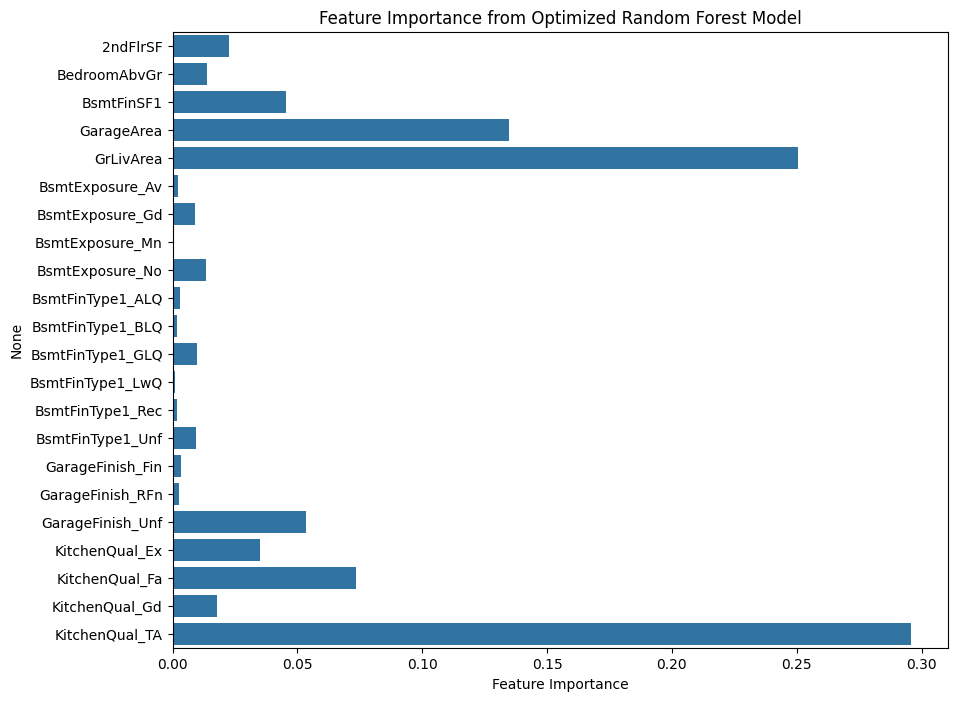

In [63]:
# Calculate and print feature importance for the optimized model
best_model = random_search.best_estimator_.named_steps['model']
feature_importances = best_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Optimized Random Forest Model')
plt.show()

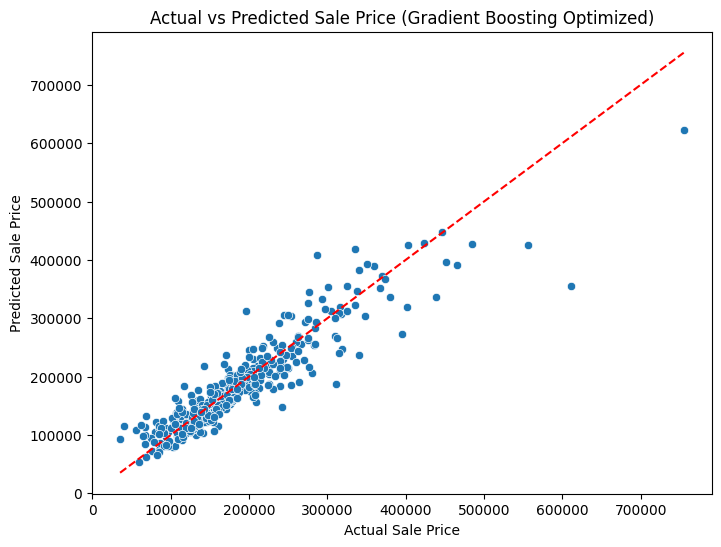

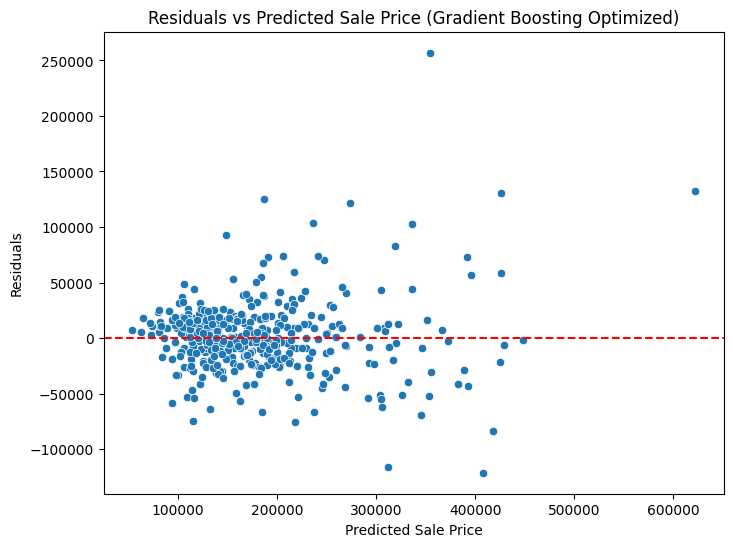

In [23]:
# Plot predicted vs actual values after optimization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_original, y=y_pred_original)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], color='red', linestyle='--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price (Gradient Boosting Optimized)")
plt.show()

# Scatter plot of residuals vs predicted values
residuals_optimized = y_test_original - y_pred_original
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_original, y=residuals_optimized)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sale Price (Gradient Boosting Optimized)")
plt.show()